### Process and validate iEEG data

In [1]:
import pandas as pd
import seaborn as sns

from ieeg_fmri_validation.iemu.process import process_iemu
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
def get_ols_mask(r2):
    ols_subset = ols_music.loc[(ols_music['pvalue'] < 1e-3 / len(ols_music)) & (ols_music['tvalue'] > 0)]
    s = []
    for subject in r2_music['subject'].unique():
        s.append(r2.loc[r2['subject'] == subject, 'name'].isin(ols_subset.loc[ols_subset['subject'] == subject, 'name']))
    return pd.concat(s)


def plot_boxplots(r2df, alpha=5e-2):
    sns.set_context('paper', font_scale=1.2)
    plt.figure(figsize=(3, 3))
    sns.boxplot(x='band', y='r2',
                data= r2df.loc[r2df['pvalue'] < alpha / r2df.shape[0]],
                showfliers=True,
                zorder=-1,
                order=r2df['band'].unique())
    plt.ylim(-1.2, 1.2)
    plt.tight_layout()
    plt.show()

### Specify BIDS directory

In [3]:
bids_dir='/Fridge/users/julia/project_chill_dataset_paper/data/BIDS2'

### Preprocess iEEG dataset

- discard bad channels
- notch filter for line noise
- common average reference
- read event annotations from vmrk files
- extract signal in five frequency bands (Hilbert transform, take envelope): delta, theta, alpha, beta nad high broadband gamma
- downsample to 25 Hz
- compute a linear fit using a block design (music/speech) on high broadband gamma signal
- compute r-squared values using block means (average over 30-second fragments): between speech and music (1), speech and task resting state (2), speech and natural resting state from 24/7 data (3) - done for all bands

In [4]:
ols_music, r2_music, r2_rest = process_iemu(bids_dir)

01
film
Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-01/ses-iemu/ieeg/sub-01_ses-iemu_task-film_acq-clinical_run-1_ieeg.vhdr...
Setting channel info structure...
Loading BIDS data done
Getting bad electrodes done
Bad channels indicated: ['AR8', 'MFL15']
Dropped ['AR8', 'MFL15']channels
Reading 0 ... 860253  =      0.000 ...   420.045 secs...
Remaining channels ['AR1', 'AR2', 'AR3', 'AR4', 'AR5', 'AR6', 'AR7', 'AR9', 'AHR1', 'AHR2', 'AHR3', 'AHR4', 'AHR5', 'AHR6', 'AHR7', 'AHR8', 'AHR9', 'PHR1', 'PHR2', 'PHR3', 'PHR4', 'PHR5', 'PHR6', 'PHR7', 'PHR8', 'PHR9', 'ITR1', 'ITR2', 'ITR3', 'ITR4', 'ITR5', 'ITR6', 'ITR7', 'ITR8', 'ITR9', 'ITR10', 'MFR1', 'MFR2', 'MFR3', 'MFR4', 'MFR5', 'MFR6', 'MFR7', 'MFR8', 'MFR9', 'MFR10', 'MFR11', 'MFR12', 'MFR13', 'MFR14', 'MFR15', 'FOR1', 'FOR2', 'FOR3', 'FOR4', 'FOR5', 'FOR6', 'FOR7', 'FOR8', 'FOR9', 'FOR10', 'FOR11', 'FOR12', 'FOR13', 'FOR14', 'FOR15', 'MFL1', 'MFL2', 'MFL3', 'MFL4',

/home/julia/Documents/project_chill_dataset_paper/git/ieeg-fmri-dataset-validation/ieeg_fmri_validation/iemu/classes.py:72: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  self.raw = mne.io.read_raw_brainvision(self.raw_path,


Remaining channels ['F01', 'F02', 'F03', 'F04', 'F05', 'F06', 'F07', 'F08', 'F09', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'F23', 'F24', 'F25', 'F27', 'F28', 'F29', 'F30', 'F31', 'F32', 'F33', 'F34', 'F35', 'F36', 'F37', 'F38', 'F39', 'F40', 'F41', 'F42', 'F43', 'F44', 'F45', 'F46', 'F47', 'F48', 'DL1', 'DL2', 'DL3', 'DL4', 'DL5', 'DL6', 'DH1', 'DH2', 'DH3', 'DH4', 'DH5', 'DH6']
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3381 samples (6.604 sec)

Notch filter done
ECoG channel type selected for re-referencing
Applying average reference.
Applying a custom ECoG reference.
CAR done
Used Annotations descriptions: ['Stimulus/end task', 'St

/home/julia/Documents/project_chill_dataset_paper/git/ieeg-fmri-dataset-validation/ieeg_fmri_validation/iemu/classes.py:72: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  self.raw = mne.io.read_raw_brainvision(self.raw_path,


Remaining channels ['F01', 'F02', 'F03', 'F04', 'F05', 'F06', 'F07', 'F08', 'F09', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'F29', 'F30', 'F31', 'F32', 'F33', 'F34', 'F35', 'F36', 'F37', 'F38', 'F39', 'F40', 'F41', 'F42', 'F43', 'F44', 'F45', 'F46', 'F47', 'F48', 'C49', 'C50', 'C51', 'C52', 'C53', 'C54', 'C57', 'C58', 'C59', 'C60', 'C61', 'C62', 'T01', 'T02', 'T03', 'T04', 'T05', 'T06', 'T07', 'T09', 'T10', 'T11', 'T12', 'T13', 'T14', 'sT1', 'sT2', 'sT3', 'sT4', 'sT5', 'sT6', 'sT7', 'sT8', 'FP1', 'FP2', 'FP3', 'FP4', 'FP5', 'FP6', 'HF1', 'HF2', 'HF3', 'HF4', 'HF5', 'HF6', 'HF7', 'HF8', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6']
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition ban

/home/julia/Documents/project_chill_dataset_paper/git/ieeg-fmri-dataset-validation/ieeg_fmri_validation/iemu/classes.py:72: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  self.raw = mne.io.read_raw_brainvision(self.raw_path,


Remaining channels ['OR01', 'OR02', 'OR03', 'OR04', 'OR05', 'OR09', 'OR10', 'OR11', 'OR12', 'OR13', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'F29', 'F30', 'F31', 'F32', 'F33', 'F34', 'F35', 'F36', 'F37', 'F38', 'F39', 'F40', 'F41', 'F42', 'F43', 'F44', 'F45', 'F46', 'F47', 'F48', 'F49', 'F50', 'F51', 'F52', 'F53', 'F54', 'F55', 'F56', 'F57', 'F58', 'F59', 'F60', 'F61', 'F62', 'F63', 'F64', 'ST1', 'ST2', 'ST3', 'ST4', 'ST5', 'ST6', 'ST7', 'ST8', 'iH1', 'iH2', 'iH3', 'iH4', 'iH5', 'iH6', 'iH7', 'iH8', 'Di1', 'Di2', 'Di3', 'Di4', 'Di5', 'Di6', 'Di7', 'Di8', 'Ds1', 'Ds2', 'Ds3', 'Ds4', 'Ds5', 'Ds6', 'Ds7', 'Ds8']
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filte

/home/julia/Documents/project_chill_dataset_paper/git/ieeg-fmri-dataset-validation/ieeg_fmri_validation/iemu/classes.py:72: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  self.raw = mne.io.read_raw_brainvision(self.raw_path,


Remaining channels ['P01', 'P02', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'P38', 'P39', 'P40', 'P41', 'P42', 'P43', 'P44', 'P45', 'P46', 'P47', 'P48', 'P49', 'P50', 'P51', 'P52', 'P53', 'P54', 'P55', 'P56', 'P57', 'P58', 'P59', 'P60', 'P61', 'P62', 'P63', 'P64', 'Oc1', 'Oc2', 'Oc3', 'Oc4', 'Oc5', 'Oc6', 'Oc7', 'Oc8', 'OB1', 'OB2', 'OB3', 'OB4', 'OB5', 'OB6', 'OB7', 'OB8', 'PB1', 'PB2', 'PB3', 'PB4', 'PB5', 'PB6', 'sT1', 'sT2', 'sT3', 'sT4', 'sT5', 'sT6', 'sT7', 'sT8']
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidt

/home/julia/Documents/project_chill_dataset_paper/git/ieeg-fmri-dataset-validation/ieeg_fmri_validation/iemu/classes.py:72: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  self.raw = mne.io.read_raw_brainvision(self.raw_path,


Remaining channels ['F01', 'F02', 'F03', 'F04', 'F05', 'F06', 'F07', 'F08', 'F09', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'F29', 'F30', 'F31', 'F32', 'F33', 'F34', 'F35', 'F36', 'F37', 'F38', 'F39', 'F40', 'F41', 'F42', 'F43', 'F44', 'F45', 'F46', 'F47', 'F48', 'P49', 'P50', 'P51', 'P52', 'P53', 'P54', 'P55', 'P56', 'P57', 'P58', 'P59', 'P60', 'P61', 'P62', 'C01', 'C02', 'C03', 'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'IH1', 'IH2', 'IH3', 'IH4', 'IH5', 'IH6', 'IH7', 'IH8', 'ST1', 'ST2', 'ST3', 'ST4', 'ST5', 'ST6', 'ST7', 'ST8', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C29', 'C30', 'C31', 'C32']
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passban

/home/julia/Documents/project_chill_dataset_paper/git/ieeg-fmri-dataset-validation/ieeg_fmri_validation/iemu/classes.py:72: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  self.raw = mne.io.read_raw_brainvision(self.raw_path,


Remaining channels ['CP01', 'CP02', 'CP03', 'CP04', 'CP05', 'CP06', 'CP07', 'CP08', 'CP09', 'CP10', 'CP11', 'CP12', 'CP13', 'CP14', 'CP15', 'CP16', 'CP17', 'CP18', 'CP19', 'CP20', 'CP21', 'CP22', 'CP23', 'CP24', 'CP25', 'CP26', 'CP27', 'CP28', 'CP29', 'CP30', 'CP31', 'CP32', 'CP33', 'CP34', 'CP35', 'CP36', 'CP37', 'CP38', 'CP39', 'CP41', 'CP42', 'CP43', 'CP44', 'CP45', 'CP46', 'CP47', 'CP48', 'CP49', 'CP50', 'CP51', 'CP52', 'CP53', 'CP54', 'CP55', 'CP56', 'CP57', 'CP58', 'CP59', 'CP60', 'CP61', 'CP62', 'CP63', 'CP64', 'FM01', 'FM02', 'FM03', 'FM04', 'FM05', 'FM06', 'FM07', 'FM08', 'FM09', 'FM10', 'FM11', 'FM12', 'FM13', 'FM14', 'FM15', 'FM16', 'FL01', 'FL02', 'FL03', 'FL04', 'FL05', 'FL06', 'FL07', 'FL08', 'FL09', 'FL10', 'FL11', 'FL12', 'FL13', 'FL14', 'FL15', 'FL16', 'iH1', 'iH2', 'iH3', 'iH4', 'iH5', 'iH6', 'iH7', 'iH8']
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design

/home/julia/Documents/project_chill_dataset_paper/git/ieeg-fmri-dataset-validation/ieeg_fmri_validation/iemu/classes.py:72: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  self.raw = mne.io.read_raw_brainvision(self.raw_path,


Remaining channels ['T01', 'T02', 'T03', 'T04', 'T05', 'T06', 'T07', 'T08', 'T09', 'T10', 'T11', 'T12', 'T13', 'T14', 'T15', 'T16', 'T17', 'T18', 'T19', 'T20', 'T21', 'T22', 'T23', 'T24', 'T25', 'T26', 'T27', 'T28', 'T29', 'T30', 'T31', 'T32', 'P33', 'P34', 'P35', 'P36', 'P37', 'P38', 'P39', 'P41', 'P42', 'P43', 'P44', 'P45', 'P46', 'P47', 'P48', 'Oc49', 'Oc50', 'Oc51', 'Oc52', 'Oc53', 'Oc54', 'Oc55', 'Oc56', 'Oc57', 'Oc58', 'Oc59', 'Oc60', 'Oc61', 'Oc62', 'Oc63', 'Oc64', 'vT1', 'vT2', 'vT3', 'vT4', 'vT5', 'vT6', 'vT7', 'vT8', 'aT3', 'aT4', 'aT5', 'aT6', 'aT7', 'sTv3', 'sTv4', 'sTv5', 'sTv6', 'sTv7', 'sTa1', 'sTa2', 'sTa3', 'sTa4', 'sTa5', 'sTa6', 'sTa7', 'sTa8']
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.5

/home/julia/Documents/project_chill_dataset_paper/git/ieeg-fmri-dataset-validation/ieeg_fmri_validation/iemu/classes.py:72: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  self.raw = mne.io.read_raw_brainvision(self.raw_path,


Notch filter done
ECoG channel type selected for re-referencing
Applying average reference.
Applying a custom ECoG reference.
CAR done
Used Annotations descriptions: ['Stimulus/end task', 'Stimulus/start task']
Reading events done
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 1691 samples (3.303 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-d

/home/julia/Documents/project_chill_dataset_paper/git/ieeg-fmri-dataset-validation/ieeg_fmri_validation/iemu/classes.py:72: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  self.raw = mne.io.read_raw_brainvision(self.raw_path,


Remaining channels ['T01', 'T02', 'T03', 'T04', 'T05', 'T06', 'T07', 'T08', 'T09', 'T10', 'T11', 'T12', 'T13', 'T14', 'T15', 'T16', 'T17', 'T18', 'T19', 'T20', 'T21', 'T22', 'T23', 'T24', 'T25', 'T26', 'T27', 'T28', 'T29', 'T30', 'T31', 'T32', 'P33', 'P34', 'P35', 'P36', 'P37', 'P38', 'P39', 'P41', 'P42', 'P43', 'P44', 'P45', 'P46', 'P47', 'PO49', 'PO50', 'PO51', 'PO52', 'PO53', 'PO54', 'PO55', 'PO56', 'PO57', 'PO58', 'PO59', 'PO60', 'PO61', 'PO62', 'PO63', 'PO64', 'F01', 'F02', 'F03', 'F04', 'F05', 'F06', 'F07', 'F08', 'vT1', 'vT3', 'vT4', 'vT5', 'vT6', 'sT1', 'sT2', 'sT3', 'sT4', 'sT5', 'Oc1', 'Oc2', 'Oc3', 'Oc4', 'Oc5', 'Oc6', 'Oc7', 'Oc8']
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length

/home/julia/Documents/project_chill_dataset_paper/git/ieeg-fmri-dataset-validation/ieeg_fmri_validation/iemu/classes.py:72: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  self.raw = mne.io.read_raw_brainvision(self.raw_path,


Remaining channels ['T01', 'T02', 'T03', 'T04', 'T05', 'T06', 'T07', 'T08', 'T09', 'T10', 'T11', 'T12', 'T13', 'T14', 'T15', 'T17', 'T18', 'T19', 'T20', 'T21', 'T22', 'T23', 'T24', 'T25', 'T26', 'T27', 'T28', 'T29', 'T30', 'T31', 'T32', 'T33', 'T34', 'T35', 'T36', 'T37', 'T38', 'T39', 'T40', 'T41', 'T42', 'T43', 'T44', 'T45', 'T46', 'T47', 'T48', 'TO49', 'TO50', 'TO51', 'TO52', 'TO53', 'TO54', 'TO57', 'TO58', 'TO59', 'TO60', 'TO61', 'TO62', 'TO63', 'vT1', 'vT2', 'vT3', 'vT4', 'vT5', 'vT6', 'vT7', 'vT8', 'sT1', 'sT2', 'sT3', 'sT4']
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3381 samples (6.604 sec)

Notch filter done
ECoG channel type selected for re-referencing
Applying average refere

/home/julia/Documents/project_chill_dataset_paper/git/ieeg-fmri-dataset-validation/ieeg_fmri_validation/iemu/classes.py:72: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  self.raw = mne.io.read_raw_brainvision(self.raw_path,


Remaining channels ['F01', 'F02', 'F03', 'F04', 'F05', 'F06', 'F07', 'F08', 'F09', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'F29', 'F30', 'F31', 'F32', 'HF01', 'HF02', 'HF03', 'HF04', 'HF05', 'HF06', 'HF07', 'HF08', 'HF09', 'HF10', 'HF11', 'HF12', 'HF13', 'HF14', 'HF15', 'HF16', 'Dv1', 'Dv2', 'Dv3', 'Dv4', 'Dv5', 'Dv6', 'Da1', 'Da2', 'Da3', 'Da4', 'Da5', 'Da6']
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 13517 samples (6.600 sec)

Notch filter done
ECoG channel type selected for re-referencing
Applying average reference.
Applying a custom ECoG reference.
CAR done
Used Annotations descriptions: [

/home/julia/Documents/project_chill_dataset_paper/git/ieeg-fmri-dataset-validation/ieeg_fmri_validation/iemu/classes.py:72: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  self.raw = mne.io.read_raw_brainvision(self.raw_path,


Remaining channels ['T01', 'T03', 'T04', 'T05', 'T06', 'T07', 'T08', 'T09', 'T10', 'T11', 'T12', 'T13', 'T14', 'T15', 'T16', 'T17', 'T18', 'T19', 'T20', 'T21', 'T22', 'T23', 'T24', 'T25', 'T26', 'T27', 'T28', 'T29', 'T30', 'T31', 'T32', 'T33', 'T34', 'T35', 'T36', 'T37', 'T38', 'T39', 'T40', 'T41', 'T42', 'T43', 'T44', 'T45', 'T46', 'T47', 'T48', 'F49', 'F50', 'F51', 'F52', 'F53', 'F54', 'F55', 'F57', 'F58', 'F59', 'F60', 'F61', 'F62', 'F63', 'vT1', 'vT2', 'vT3', 'vT4', 'vT5', 'vT6', 'vT7', 'vT8', 'sT1', 'sT2', 'sT3', 'sT4', 'sT5', 'sT6', 'sT7', 'sT8', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6']
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3381 samples (6.604 sec)

Notch filter done
ECoG channe

/home/julia/Documents/project_chill_dataset_paper/git/ieeg-fmri-dataset-validation/ieeg_fmri_validation/iemu/classes.py:72: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  self.raw = mne.io.read_raw_brainvision(self.raw_path,


Notch filter done
ECoG channel type selected for re-referencing
Applying average reference.
Applying a custom ECoG reference.
CAR done
Used Annotations descriptions: ['Stimulus/end task', 'Stimulus/start task']
Reading events done
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 1691 samples (3.303 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-d

/home/julia/Documents/project_chill_dataset_paper/git/ieeg-fmri-dataset-validation/ieeg_fmri_validation/iemu/classes.py:72: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  self.raw = mne.io.read_raw_brainvision(self.raw_path,


Remaining channels ['P01', 'P02', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'P38', 'P39', 'P40', 'P41', 'P42', 'P43', 'P44', 'P45', 'P46', 'P47', 'P48', 'T49', 'T50', 'T51', 'T52', 'T53', 'T54', 'T55', 'T56', 'T57', 'T58', 'T59', 'T60', 'T61', 'T62', 'T63', 'T64', 'Dv1', 'Dv2', 'Dv3', 'Dv4', 'Dv5', 'Dv6', 'Dv7', 'Dv8', 'Da1', 'Da2', 'Da3', 'Da4', 'Da5', 'Da6', 'Da7', 'Da8']
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3381 samples (6.604 sec)

Notch filter done
ECoG channel type selected

/home/julia/Documents/project_chill_dataset_paper/git/ieeg-fmri-dataset-validation/ieeg_fmri_validation/iemu/classes.py:72: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  self.raw = mne.io.read_raw_brainvision(self.raw_path,


Remaining channels ['T01', 'T02', 'T03', 'T04', 'T05', 'T06', 'T07', 'T08', 'T09', 'T10', 'T11', 'T12', 'T13', 'T14', 'T15', 'T16', 'T17', 'T18', 'T19', 'T20', 'T21', 'T22', 'T23', 'T24', 'T25', 'T26', 'T27', 'T28', 'T30', 'T31', 'T32', 'Oc1', 'Oc2', 'Oc3', 'Oc4', 'Oc5', 'Oc6', 'Oc7', 'Oc8', 'SOT1', 'SOT2', 'SOT3', 'SOT4', 'SOT5', 'SOT6', 'SOT7', 'SOT8', 'sTa1', 'sTa2', 'sTa3', 'sTa5', 'sTa6', 'sTa7', 'sTv1', 'sTv2', 'sTv3', 'sTv4', 'sTv5', 'sTv6', 'sTv7', 'sTv8', 'C01', 'C02', 'C03', 'C04', 'C05', 'C06', 'C07', 'C08']
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3381 samples (6.604 sec)

Notch filter done
ECoG channel type selected for re-referencing
Applying average reference.
Applyin

/home/julia/Documents/project_chill_dataset_paper/git/ieeg-fmri-dataset-validation/ieeg_fmri_validation/iemu/classes.py:72: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  self.raw = mne.io.read_raw_brainvision(self.raw_path,


Remaining channels ['F01', 'F02', 'F03', 'F04', 'F05', 'F06', 'F07', 'F08', 'F09', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'F29', 'F30', 'F31', 'F32', 'FH01', 'FH02', 'FH03', 'FH05', 'FH06', 'FH07', 'FH08', 'FH09', 'FH10', 'FH11', 'FH12', 'FH13', 'FH14', 'FH15', 'FH16', 'FOA1', 'FOA2', 'FOA3', 'FOA4', 'FOA5', 'FOV1', 'FOV2', 'FOV3', 'FOV4', 'FOV5', 'FOV6', 'FOV7', 'FOV8', 'C01', 'C02', 'C03', 'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'C31', 'C32', 'T01', 'T02', 'T03', 'T04', 'T05', 'T06', 'T07', 'T08', 'T09', 'T10', 'T11', 'T12', 'T13', 'T14', 'T15', 'T16', 'sT1', 'sT2', 'sT3', 'sT4', 'sT5', 'sT6', 'sT7', 'sT8']
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Win

/home/julia/Documents/project_chill_dataset_paper/git/ieeg-fmri-dataset-validation/ieeg_fmri_validation/iemu/classes.py:72: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  self.raw = mne.io.read_raw_brainvision(self.raw_path,


Remaining channels ['T01', 'T02', 'T03', 'T04', 'T05', 'T06', 'T07', 'T08', 'T09', 'T10', 'T11', 'T12', 'T13', 'T14', 'T15', 'T16', 'T17', 'T18', 'T19', 'T20', 'T21', 'T22', 'T23', 'T24', 'T25', 'T26', 'T27', 'T28', 'T29', 'T30', 'T31', 'T32', 'PO33', 'PO34', 'PO35', 'PO36', 'PO37', 'PO38', 'PO39', 'PO40', 'PO41', 'PO42', 'PO43', 'PO44', 'PO45', 'PO46', 'PO47', 'PO48', 'P49', 'P50', 'P51', 'P52', 'P53', 'P54', 'P55', 'P56', 'P57', 'P58', 'P59', 'P60', 'P61', 'P62', 'P63', 'P64', 'vT1', 'vT2', 'vT3', 'vT4', 'vT5', 'vT6', 'vT7', 'sTv1', 'sTv2', 'sTv3', 'sTv4', 'sTv5', 'sTv6', 'sTv7', 'sTa1', 'sTa2', 'sTa3', 'sTa4', 'sTa5', 'sTa6', 'sTa7', 'sTa8', 'HP1', 'HP2', 'HP3', 'HP4', 'HP5', 'HP6', 'HP7', 'HP8']
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50

/home/julia/Documents/project_chill_dataset_paper/git/ieeg-fmri-dataset-validation/ieeg_fmri_validation/iemu/classes.py:72: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  self.raw = mne.io.read_raw_brainvision(self.raw_path,


Remaining channels ['T01', 'T02', 'T03', 'T04', 'T05', 'T06', 'T07', 'T08', 'T09', 'T10', 'T11', 'T12', 'T13', 'T14', 'T15', 'T16', 'T17', 'T18', 'T19', 'T20', 'T21', 'T22', 'T23', 'T24', 'T25', 'T26', 'T27', 'T28', 'T29', 'T30', 'T31', 'T32', 'FB01', 'FB02', 'FB03', 'FB04', 'FB05', 'FB06', 'FB07', 'FB08', 'FB09', 'FB10', 'FB11', 'FB12', 'FB13', 'FB14', 'FB15', 'FB16', 'vT1', 'vT2', 'vT3', 'vT4', 'vT5', 'vT6', 'vT7', 'vT8', 'sT1', 'sT2', 'sT3', 'sT4', 'sT5', 'C01', 'C02', 'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C11', 'C12', 'C14', 'C15', 'C16', 'C17', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C26', 'C27', 'C28', 'C29', 'C30', 'FLv1', 'FLv2', 'FLv3', 'FLv4', 'FLv5', 'FLm1', 'FLm2', 'FLm3', 'FLm4', 'FLm5', 'FLm6', 'FLm7', 'FLm8', 'FLa1', 'FLa2', 'FLa3', 'FLa4', 'FLa5', 'FLa6', 'FLa7', 'FLa8']
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming win

### Separate two types of rest data: task rest and natural rest

In [5]:
r2_rest_task = r2_rest.loc[r2_rest['analysis'] == 'speech-rest task']
r2_rest_natural = r2_rest.loc[r2_rest['analysis'] == 'speech-natural rest']

### Use electrode mask from the linear fit (block design on high gamma), apply to r-squared values across all frequency bands

In [6]:
ols_music_mask = get_ols_mask(r2_music)
ols_rest_task_mask = get_ols_mask(r2_rest_task)
ols_rest_natural_mask = get_ols_mask(r2_rest_natural)

### Plot boxplots of r-squared values per comparison: speech and music (1), speech and rest task (2), speech and natural rest (3) and per frequency band

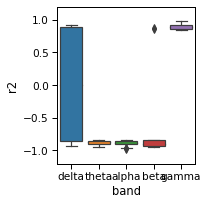

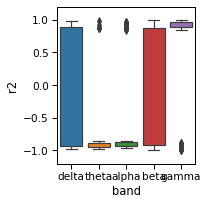

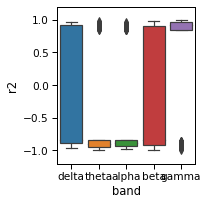

In [7]:
plot_boxplots(r2_music[ols_music_mask])
plot_boxplots(r2_rest_task[ols_rest_task_mask])
plot_boxplots(r2_rest_natural[ols_rest_natural_mask])